#### Importing modules

In [3]:
from datetime import datetime, timedelta # this module will allow us to deal with time
from IPython.display import HTML # this module will allow us to view and loop through an animation
from matplotlib import animation, rc # this module will allow us to create an animation
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import numpy as np

In [4]:
### 4
data = Dataset('Python_2.nc','r')
time = np.array(data['time'])
print('units of time are hours since 1900-1-1')


units of time are hours since 1900-1-1


In [5]:
### 5
data.close

<function Dataset.close>

In [6]:
### 6
today = datetime.strptime('2020-01-24-22', '%Y-%m-%d-%H') 
print('Today:', today.strftime('%A, %d of %B, %Y, %H'),'UTC')

Today: Friday, 24 of January, 2020, 22 UTC


In [7]:
### 7
startTime = datetime.strptime('1900-01-01', '%Y-%m-%d') 
datetime_times = startTime + timedelta(hours=float(time[0]))
print('Today:', datetime_times.strftime('%A, %d of %B, %Y'))

Today: Monday, 03 of February, 2003


In [8]:
### 8
data = Dataset('Python_2.nc','r')

t2m = np.array(data['t2m']) 
t2m = np.squeeze(t2m)
Temp = t2m
Temp = np.array(Temp)
print('shape of temp is :', Temp.shape)

lat = np.array(data['latitude'])
lat = np.squeeze(lat)
lat = np.array(lat)

lon = np.array(data['longitude'])
lon = np.squeeze(lon)
lon = np.array(lon)

LonGrid, LatGrid = np.meshgrid(lon,lat)
print('shape of Longrid is :', LonGrid.shape)
print('shape of LatGrid is :', LatGrid.shape)
data.close

shape of temp is : (721, 1440)
shape of Longrid is : (721, 1440)
shape of LatGrid is : (721, 1440)


<function Dataset.close>

In [9]:
### 9
dx = dy = 25000.
dT_dy = (Temp[2:,:]-Temp[:-2,:])/(2*dy)
dT_dx = (Temp[:,2:]-Temp[:,:-2])/(2*dx)
print('shape of dT_dx is :', dT_dx.shape)
print('shape of dT_dy is :', dT_dy.shape)

shape of dT_dx is : (721, 1438)
shape of dT_dy is : (719, 1440)


/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Latitude')

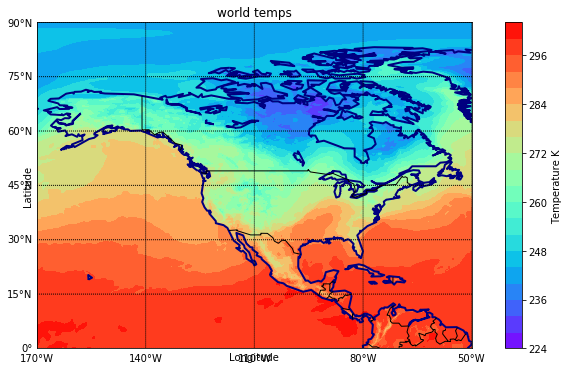

In [10]:
### 10
m1 = Basemap(llcrnrlon=190, llcrnrlat=-0, urcrnrlon=310, urcrnrlat=90)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
c2 = m1.contourf(LonGrid, LatGrid, Temp, 
           20, cmap='rainbow', ax=ax)
m1.drawcoastlines(color='navy', linewidth=2, ax=ax)
m1.drawparallels(np.arange(0, 91, 15), labels=[1,0,0,0], ax=ax) 
m1.drawcountries(color = 'black', linewidth=1, ax=ax)
m1.drawmeridians(np.arange(190, 311, 30), labels=[0,0,0,1], ax=ax) 
plt.colorbar(c2, label='Temperature K')
ax.set_title('world temps')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Latitude')

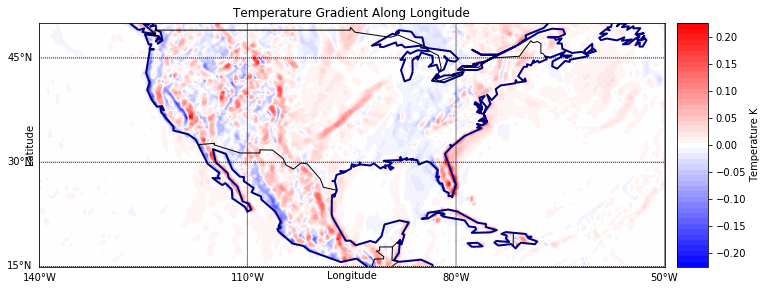

In [11]:
### 11
m2 = Basemap(llcrnrlon=220, llcrnrlat=15, urcrnrlon=310, urcrnrlat=50)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
c2 = m2.contourf(LonGrid[:,1:-1], LatGrid[:,1:-1], dT_dx*1000, 
           levels = np.arange(-0.225, 0.235, .01), cmap='bwr', ax=ax)
m2.drawcoastlines(color='navy', linewidth=2, ax=ax)
m2.drawparallels(np.arange(0, 91, 15), labels=[1,0,0,0], ax=ax) 
m2.drawcountries(color = 'black', linewidth=1, ax=ax)
m2.drawmeridians(np.arange(220, 311, 30), labels=[0,0,0,1], ax=ax) 
m2.colorbar(c2, label='Temperature K', ticks = np.arange(-0.2, 0.275, .05))
ax.set_title('Temperature Gradient Along Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Latitude')

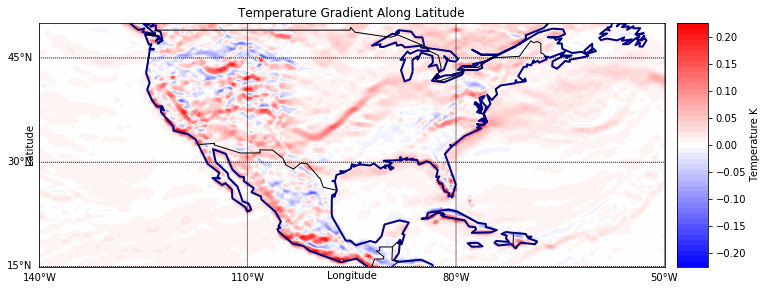

In [12]:
### 12
m2 = Basemap(llcrnrlon=220, llcrnrlat=15, urcrnrlon=310, urcrnrlat=50)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
c2 = m2.contourf(LonGrid[1:-1,:], LatGrid[1:-1,:], dT_dy*1000, 
           levels = np.arange(-0.225, 0.235, .01), cmap='bwr', ax=ax)
m2.drawcoastlines(color='navy', linewidth=2, ax=ax)
m2.drawparallels(np.arange(0, 91, 15), labels=[1,0,0,0], ax=ax) 
m2.drawcountries(color = 'black', linewidth=1, ax=ax)
m2.drawmeridians(np.arange(220, 311, 30), labels=[0,0,0,1], ax=ax) 
m2.colorbar(c2, label='Temperature K', ticks = np.arange(-0.2, 0.275, .05))
ax.set_title('Temperature Gradient Along Latitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0, 0.5, 'Latitude')

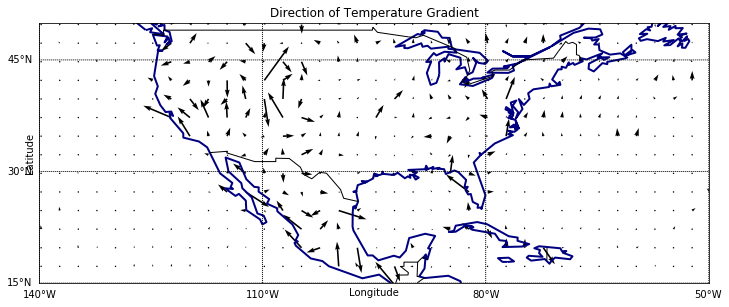

In [13]:
### 13
m2 = Basemap(llcrnrlon=220, llcrnrlat=15, urcrnrlon=310, urcrnrlat=50)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
m2.quiver(LonGrid[1:-1:10,1:-1:10], LatGrid[1:-1:10,1:-1:10], dT_dx[1:-1:10,::10]*1000, dT_dy[::10,1:-1:10]*1000, color='k')
m2.drawcoastlines(color='navy', linewidth=2, ax=ax)
m2.drawparallels(np.arange(0, 91, 15), labels=[1,0,0,0], ax=ax) 
m2.drawcountries(color = 'black', linewidth=1, ax=ax)
m2.drawmeridians(np.arange(220, 311, 30), labels=[0,0,0,1], ax=ax) 
ax.set_title('Direction of Temperature Gradient')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#### Making Loops

In [14]:
### 14
data = Dataset('Python_3.nc','r')
time = np.array(data['time'])
print(time)

startTime = datetime.strptime('1900-01-01', '%Y-%m-%d') 
datetime_times = [startTime + timedelta(hours=float(time[tm])) for tm in range(16)]
print('Today:', datetime_times[0].strftime('%A, %d of %B, %Y'))
datetime_times

[903648 903654 903660 903666 903672 903678 903684 903690 903696 903702
 903708 903714 903720 903726 903732 903738]
Today: Sunday, 02 of February, 2003


[datetime.datetime(2003, 2, 2, 0, 0),
 datetime.datetime(2003, 2, 2, 6, 0),
 datetime.datetime(2003, 2, 2, 12, 0),
 datetime.datetime(2003, 2, 2, 18, 0),
 datetime.datetime(2003, 2, 3, 0, 0),
 datetime.datetime(2003, 2, 3, 6, 0),
 datetime.datetime(2003, 2, 3, 12, 0),
 datetime.datetime(2003, 2, 3, 18, 0),
 datetime.datetime(2003, 2, 4, 0, 0),
 datetime.datetime(2003, 2, 4, 6, 0),
 datetime.datetime(2003, 2, 4, 12, 0),
 datetime.datetime(2003, 2, 4, 18, 0),
 datetime.datetime(2003, 2, 5, 0, 0),
 datetime.datetime(2003, 2, 5, 6, 0),
 datetime.datetime(2003, 2, 5, 12, 0),
 datetime.datetime(2003, 2, 5, 18, 0)]

In [15]:
### 15
t2m = np.array(data['t2m']) 
t2m = np.squeeze(t2m)
Temp = t2m
Temp = np.array(Temp)
print('shape of temp is :', Temp.shape)
data.close

shape of temp is : (16, 721, 1440)


<function Dataset.close>

/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/Adam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


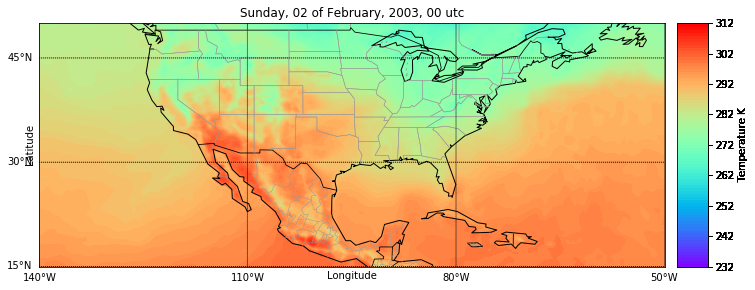

In [16]:
### 16
#levels=np.arange(min_temperature, max_temperature, 1)

m = Basemap(llcrnrlon=220, llcrnrlat=15, urcrnrlon=310, urcrnrlat=50)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)

def animate(i):
    ax.clear()
    m.drawcoastlines(ax=ax, linewidth=1)
    m.drawcountries(ax=ax, linewidth=.8)
    m.drawparallels(np.arange(0, 91, 15), labels=[1,0,0,0], ax=ax) 
    m.drawmeridians(np.arange(220, 311, 30), labels=[0,0,0,1], ax=ax)
    m.drawstates(ax=ax, linewidth=.5, color='.6')
    cont = m.contourf(LonGrid, LatGrid, Temp[i], levels=np.arange(232, 313, 1), cmap='rainbow')
    ax.set_title(datetime_times[i].strftime('%A, %d of %B, %Y, %H utc'))
    m.colorbar(cont, label='Temperature K', ticks = np.arange(232, 313, 10))
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude') 

anim = animation.FuncAnimation(fig, animate, frames=len(datetime_times), interval=500, blit=False)

HTML(anim.to_jshtml())

My colorbar extends range to fit max and min temperatures shown on map